In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [5]:
train_dir = "../dataset/TRAIN"
test_dir = "../dataset/TEST"

print("Training Path:", os.listdir(train_dir))
print("Testing Path:", os.listdir(test_dir))


Training Path: ['Organic', 'Recyclable']
Testing Path: ['Organic', 'Recyclable']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\sri saraswathi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)


In [13]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 326s 461ms/step - accuracy: 0.8703 - loss: 0.3096 - val_accuracy: 0.8735 - val_loss: 0.3155
Epoch 2/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 233s 330ms/step - accuracy: 0.8782 - loss: 0.2878 - val_accuracy: 0.8957 - val_loss: 0.2719
Epoch 3/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 372s 527ms/step - accuracy: 0.8833 - loss: 0.2827 - val_accuracy: 0.8834 - val_loss: 0.3030
Epoch 4/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 416s 590ms/step - accuracy: 0.8856 - loss: 0.2800 - val_accuracy: 0.8651 - val_loss: 0.3526
Epoch 5/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 614s 869ms/step - accuracy: 0.8892 - loss: 0.2691 - val_accuracy: 0.9077 - val_loss: 0.2499
Epoch 6/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 307s 435ms/step - accuracy: 0.8867 - loss: 0.2753 - val_accuracy: 0.8866 - val_loss: 0.2938
Epoch 7/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 304s 430ms/step - accuracy: 0.8904 - loss: 0.2693 - val_accuracy: 0.8699 - val_loss: 0.3398
Epoch 8/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 299s 423ms/step - accuracy: 0.8998 -

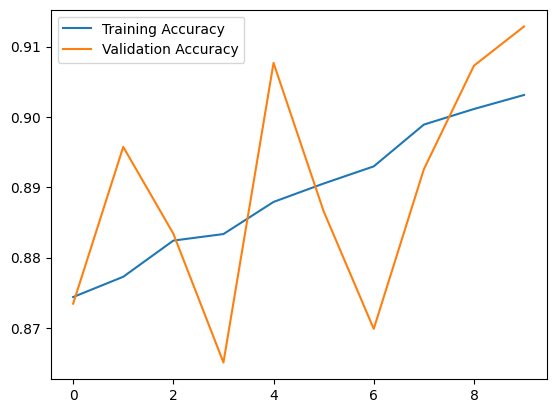

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sri saraswathi\AppData\Local\Temp\ipykernel_22008\1650701705.py:29: SyntaxWarning: invalid escape sequence '\d'
  predict_image("..\dataset\TEST\Organic\O_12568.jpg")  # change this path to your actual image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


C:\Users\sri saraswathi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


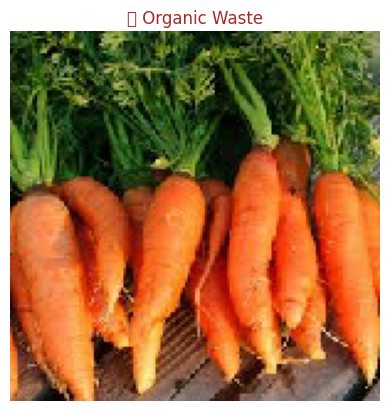

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved best model
model = load_model("best_model.keras")

# Function to predict the waste type
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize
    
    prediction = model.predict(img_array)
    
    plt.imshow(img)
    plt.axis('off')
    
    if prediction[0][0] > 0.5:
        plt.title("♻️ Recyclable Waste", color='green')
    else:
        plt.title("🌿 Organic Waste", color='brown')
    
    plt.show()

# Example test image
predict_image("..\dataset\TEST\Organic\O_12568.jpg")  # change this path to your actual image


In [ ]:
predict_image("../dataset/TEST/Organic/your_image.jpg")
predict_image("../dataset/TEST/Recyclable/your_image.jpg")
